In [1]:
# 0. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# 1. Load datasets
dev = pd.read_csv('../data/assignment1_dev_set.csv')
eval = pd.read_csv('../data/assignment1_val_set.csv')


In [3]:
# 2. Basic exploration
print("Shape:")
print(" - Development set:", dev.shape)
print(" - Evaluation set:", eval.shape)

print("\nFirst rows of development set:")
display(dev.head())

print("\nFirst rows of evaluation set:")
display(eval.head())

print("\nDescriptive statistics (development set):")
display(dev.describe())

print("\nDescriptive statistics (evaluation set):")
display(eval.describe())


Shape:
 - Development set: (489, 141)
 - Evaluation set: (211, 141)

First rows of development set:


,Unnamed: 0,Project ID,Experiment type,Sex,Host age,BMI,Disease MESH ID,Acholeplasma axanthum,Acidaminococcus fermentans,Acidaminococcus intestini,...,Clostridium sphenoides,Clostridium spiroforme,Clostridium stercorarium,Clostridium symbiosum,Clostridium thermosuccinogenes,Clostridium xylanolyticum,Eubacterium brachy,Eubacterium dolichum,Eubacterium sulci,Ruminococcus gnavus
0,0,PRJEB11419,Metagenomics,Male,53.0,19.01,D006262,0.000000,0.000000,0.000000,...,0.005891,0.029457,0.000000,0.000000,0.002946,0.000000,0.000000,0.000000,0.002946,0.100153
1,1,PRJNA388263,Metagenomics,Female,21.0,23.50,D006262,0.001028,0.000000,0.000000,...,0.000000,0.002569,0.412652,0.003083,0.000000,0.000000,0.008736,0.014903,0.077597,0.004625
2,2,PRJNA388263,Metagenomics,Male,52.0,25.80,D006262,0.001406,0.000000,0.000000,...,0.000000,0.005624,0.002812,0.007031,0.000000,0.000000,0.000000,0.000000,0.005624,0.016873
3,3,PRJEB11419,Metagenomics,Female,40.0,23.49,D006262,0.000000,0.008825,0.273562,...,0.017649,0.198553,0.000000,0.158842,0.030886,0.101483,0.000000,0.000000,0.000000,0.000000
4,4,PRJEB11419,Metagenomics,Female,30.0,22.60,D006262,0.002878,0.037419,7.359970,...,0.305106,0.135283,0.000000,0.051811,0.054689,0.083473,0.020148,0.000000,0.054689,0.011513



First rows of evaluation set:


,Unnamed: 0,Project ID,Experiment type,Sex,Host age,BMI,Disease MESH ID,Acholeplasma axanthum,Acidaminococcus fermentans,Acidaminococcus intestini,...,Clostridium sphenoides,Clostridium spiroforme,Clostridium stercorarium,Clostridium symbiosum,Clostridium thermosuccinogenes,Clostridium xylanolyticum,Eubacterium brachy,Eubacterium dolichum,Eubacterium sulci,Ruminococcus gnavus
0,0,PRJEB11419,Metagenomics,Male,60.0,25.71,D006262,0.0,0.000000,1.621960,...,0.000000,2.871240,0.0,0.068238,0.115479,0.015747,0.010498,0.000000,0.010498,0.551152
1,1,PRJNA379979,Metagenomics,Male,57.0,27.20,D006262,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2,PRJEB11419,Metagenomics,Male,65.0,22.35,D006262,0.0,0.002095,0.000000,...,0.000000,0.064936,0.0,0.016758,0.000000,0.041895,0.010474,0.006284,0.014663,0.000000
3,3,PRJEB11419,Metagenomics,Male,55.0,25.52,D006262,0.0,0.000000,0.044998,...,0.003461,0.089996,0.0,0.003461,0.006923,0.000000,0.000000,0.020768,0.034614,0.013846
4,4,PRJNA379979,Metagenomics,Female,54.0,21.60,D006262,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000



Descriptive statistics (development set):


,Unnamed: 0,Host age,BMI,Acholeplasma axanthum,Acidaminococcus fermentans,Acidaminococcus intestini,Actinomyces lingnae,Akkermansia muciniphila,Alistipes finegoldii,Alistipes indistinctus,...,Clostridium sphenoides,Clostridium spiroforme,Clostridium stercorarium,Clostridium symbiosum,Clostridium thermosuccinogenes,Clostridium xylanolyticum,Eubacterium brachy,Eubacterium dolichum,Eubacterium sulci,Ruminococcus gnavus
count,489.000000,489.000000,489.00000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,...,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000
mean,244.000000,46.703497,24.93955,0.016818,0.029968,0.294917,0.001608,1.555914,0.249606,0.061796,...,0.029822,0.247603,0.032148,0.097871,0.052936,0.038531,0.006565,0.012565,0.041855,0.091976
std,141.306405,15.728231,4.20771,0.145035,0.197816,0.804704,0.010431,4.306539,0.630670,0.239054,...,0.090605,0.490321,0.180606,0.197044,0.310313,0.122225,0.018357,0.097056,0.181979,0.416085
min,0.000000,19.000000,16.97000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,122.000000,31.000000,22.38000,0.000000,0.000000,0.000000,0.000000,0.003438,0.003380,0.000000,...,0.000000,0.002570,0.000000,0.004881,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,244.000000,52.000000,25.10000,0.000000,0.000000,0.001109,0.000000,0.034284,0.044961,0.000000,...,0.000260,0.047224,0.000000,0.029362,0.000000,0.001687,0.000000,0.000000,0.003266,0.007035
75%,366.000000,58.000000,25.80000,0.000000,0.000000,0.129398,0.000000,0.820242,0.188550,0.045111,...,0.027723,0.303173,0.005768,0.100294,0.015439,0.018352,0.005693,0.000000,0.020020,0.020978
max,488.000000,81.000000,67.26000,2.861300,2.622820,7.660350,0.206426,38.834900,6.068670,4.478660,...,1.465160,3.714530,3.118150,1.801190,4.726220,1.173380,0.273194,1.939150,2.478070,6.752840



Descriptive statistics (evaluation set):


,Unnamed: 0,Host age,BMI,Acholeplasma axanthum,Acidaminococcus fermentans,Acidaminococcus intestini,Actinomyces lingnae,Akkermansia muciniphila,Alistipes finegoldii,Alistipes indistinctus,...,Clostridium sphenoides,Clostridium spiroforme,Clostridium stercorarium,Clostridium symbiosum,Clostridium thermosuccinogenes,Clostridium xylanolyticum,Eubacterium brachy,Eubacterium dolichum,Eubacterium sulci,Ruminococcus gnavus
count,211.00000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,...,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,105.00000,46.303318,24.800853,0.028603,0.007540,0.333079,0.006520,1.275855,0.256110,0.056868,...,0.023161,0.231486,0.036935,0.102440,0.031075,0.049638,0.006270,0.012285,0.017258,0.131753
std,61.05462,16.056832,3.987255,0.209176,0.049924,0.857101,0.052926,3.757554,0.800050,0.239581,...,0.061168,0.539919,0.204636,0.210114,0.133408,0.210740,0.013510,0.117794,0.039845,0.661640
min,0.00000,19.000000,16.970000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.50000,31.000000,22.220000,0.000000,0.000000,0.000000,0.000000,0.002942,0.002488,0.000000,...,0.000000,0.002643,0.000000,0.001640,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,105.00000,52.000000,25.100000,0.000000,0.000000,0.001429,0.000000,0.044957,0.057409,0.000000,...,0.000000,0.046365,0.000000,0.024696,0.000000,0.003468,0.000000,0.000000,0.002977,0.005630
75%,157.50000,57.000000,25.800000,0.000000,0.000000,0.112273,0.000833,0.560304,0.198418,0.025187,...,0.017703,0.267308,0.006942,0.108798,0.010384,0.022265,0.005369,0.000000,0.015401,0.019473
max,210.00000,79.000000,45.200000,2.740080,0.565065,4.708840,0.645116,32.133600,9.857790,3.187810,...,0.549399,5.549120,2.708990,1.726760,1.683160,2.310910,0.086478,1.696490,0.325267,6.537770


In [4]:
# 3. Check for symmetry in columns

columns_dev = set(dev.columns)
columns_eval = set(eval.columns)

only_in_dev = columns_dev - columns_eval
only_in_eval = columns_eval - columns_dev

if only_in_dev or only_in_eval:
    print(" Warning: Column mismatch detected!")
    print("Columns only in dev:", only_in_dev)
    print("Columns only in eval:", only_in_eval)
else:
    print("dev and eval sets have matching columns as expected.")


dev and eval sets have matching columns as expected.


In [5]:
# 3.1 Check for duplicates
print("Duplicate rows in development set:", dev.duplicated().sum())
print("Duplicate rows in evaluation set:", eval.duplicated().sum())


Duplicate rows in development set: 0
Duplicate rows in evaluation set: 0


In [6]:
# 3.2 Check for missing values
print("Missing values per column (development set):")
display(dev.isnull().sum())

print("Missing values per column (evaluation set):")
display(eval.isnull().sum())


Missing values per column (development set):


Unnamed: 0                   0
Project ID                   0
Experiment type              0
Sex                          0
Host age                     0
                            ..
Clostridium xylanolyticum    0
Eubacterium brachy           0
Eubacterium dolichum         0
Eubacterium sulci            0
Ruminococcus gnavus          0
Length: 141, dtype: int64

Missing values per column (evaluation set):


Unnamed: 0                   0
Project ID                   0
Experiment type              0
Sex                          0
Host age                     0
                            ..
Clostridium xylanolyticum    0
Eubacterium brachy           0
Eubacterium dolichum         0
Eubacterium sulci            0
Ruminococcus gnavus          0
Length: 141, dtype: int64

In [7]:
# 3.4: Show any non-numeric columns
non_numeric_cols = dev.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns not scaled:", non_numeric_cols.tolist())

for col in non_numeric_cols:
    print(f"\nUnique values in '{col}':")
    print(dev[col].unique())


Non-numeric columns not scaled: ['Project ID', 'Experiment type', 'Sex', 'Disease MESH ID']

Unique values in 'Project ID':
['PRJEB11419' 'PRJNA388263' 'PRJNA485797' 'PRJNA379979' 'PRJNA428202'
 'PRJNA397219']

Unique values in 'Experiment type':
['Metagenomics']

Unique values in 'Sex':
['Male' 'Female']

Unique values in 'Disease MESH ID':
['D006262']


In [8]:
# 4. Basic exploration Remove irrelevant columns and set sex as binary 

# Drop columns that are uninformative or identifiers
columns_to_drop = ['Project ID', 'Unnamed: 0', 'Experiment type', 'Disease MESH ID']
dev = dev.drop(columns=columns_to_drop)
eval = eval.drop(columns=columns_to_drop)

# encode 'Sex' as binary
dev['Sex'] = dev['Sex'].map({'Male': 0, 'Female': 1})
eval['Sex'] = eval['Sex'].map({'Male': 0, 'Female': 1})


In [9]:
# 5. Separate target before any transformations
y_dev = dev['BMI']
y_eval = eval['BMI']

# Then drop it from the datasets
dev = dev.drop(columns=['BMI'])
eval = eval.drop(columns=['BMI'])

In [10]:
# 5. Identify and drop columns with many zeros (before winsorizing)

cols_to_drop = []
numeric_cols_common = list(set(
    dev.select_dtypes(include=['number']).columns
).intersection(
    eval.select_dtypes(include=['number']).columns
))

zero_threshold = 0.75

for col in numeric_cols_common:
    zero_count_dev = (dev[col] == 0).sum()
    if zero_count_dev > zero_threshold * dev.shape[0]:
        cols_to_drop.append(col)
        print(f"{col:40s} → Dev Zeros: {zero_count_dev}")

print(f"\nColumns to drop due to excessive zeros (> {int(zero_threshold * 100)}%): {len(cols_to_drop)}")

# Drop the columns from both sets
dev_reduced = dev.drop(columns=cols_to_drop)
eval_reduced = eval.drop(columns=cols_to_drop)


Streptococcus infantarius                → Dev Zeros: 384
Prevotella oryzae                        → Dev Zeros: 380
Hungatella hathewayi                     → Dev Zeros: 422
Ethanoligenens harbinense                → Dev Zeros: 378
Coprococcus catus                        → Dev Zeros: 433
Desulfovibrio vulgaris                   → Dev Zeros: 369
Clostridium sp.                          → Dev Zeros: 410
Desulfovibrio piger                      → Dev Zeros: 388
Alistipes sp. RMA 9912                   → Dev Zeros: 383
Clostridium amylolyticum                 → Dev Zeros: 376
Lachnospiraceae bacterium 3_1_57FAA_CT1  → Dev Zeros: 471
Flavonifractor plautii                   → Dev Zeros: 474
Clostridium asparagiforme                → Dev Zeros: 473
Eubacterium dolichum                     → Dev Zeros: 372
Anaerofustis stercorihominis             → Dev Zeros: 370
Bifidobacterium bifidum                  → Dev Zeros: 384
Acholeplasma axanthum                    → Dev Zeros: 405
Catabacter hon

In [11]:
# 6. Outlier detection using IQR

def count_outliers(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
        outliers[col] = outlier_count
    return pd.Series(outliers).sort_values(ascending=False)

numeric_cols_dev_reduced = dev_reduced.select_dtypes(include=np.number).columns
numeric_cols_eval_reduced = eval_reduced.select_dtypes(include=np.number).columns

print("\nTop 10 variables with most outliers (development set):")
display(count_outliers(dev_reduced, numeric_cols_dev_reduced).head(10))

print("\nTop 10 variables with most outliers (evaluation set):")
display(count_outliers(eval_reduced, numeric_cols_eval_reduced).head(10))



Top 10 variables with most outliers (development set):


Prevotella bivia                119
Prevotella timonensis           117
Collinsella intestinalis        113
Bifidobacterium tsurumiense     112
Ruminococcus sp. DSM 100440     111
Sutterella parvirubra           111
Desulfovibrio fairfieldensis    108
Peptoniphilus lacrimalis        100
Acidaminococcus intestini        97
Bifidobacterium saguini          94
dtype: int64


Top 10 variables with most outliers (evaluation set):


Desulfovibrio fairfieldensis    52
Collinsella intestinalis        50
Ruminococcus sp. DSM 100440     48
Prevotella timonensis           46
Sutterella parvirubra           46
Alistipes indistinctus          44
Parabacteroides goldsteinii     42
Bifidobacterium saguini         42
Acidaminococcus intestini       41
Bacteroides gallinarum          40
dtype: int64

In [12]:
# 6.1 Winsorizing (clip outliers instead of removing them)

def apply_winsorization(df, columns, lower=0.01, upper=0.99):
    df_winsorized = df.copy()
    for col in columns:
        lower_bound = df[col].quantile(lower)
        upper_bound = df[col].quantile(upper)
        df_winsorized[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df_winsorized

# Apply winsorizing to numeric features
dev_clean = apply_winsorization(dev_reduced, numeric_cols_dev_reduced)
eval_clean = apply_winsorization(eval_reduced, numeric_cols_eval_reduced)

print(f"\n Winsorization applied to {len(numeric_cols_dev_reduced)} numeric columns.")



 Winsorization applied to 96 numeric columns.


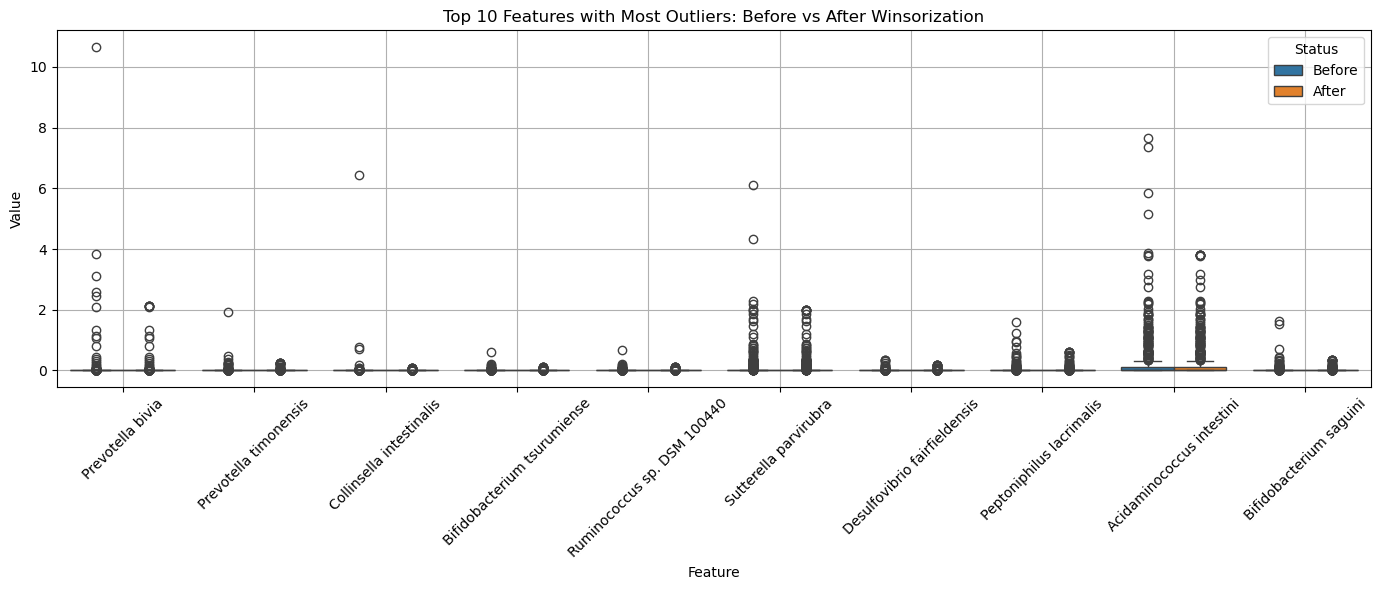

In [13]:
# 6.2 Use the count_outliers() output to get top 10 features with the most outliers (from step 6)
top_outlier_cols = count_outliers(dev_reduced, numeric_cols_dev_reduced).head(10).index.tolist()

# Combine both versions: before (dev_reduced) and after (dev_clean) winsorization
df_long = pd.concat([
    dev_reduced[top_outlier_cols].assign(Status='Before'),
    dev_clean[top_outlier_cols].assign(Status='After')
])

# Melt the dataframe for seaborn boxplot format
df_long_melted = df_long.melt(id_vars='Status', var_name='Feature', value_name='Value')

# Create the boxplot
plt.figure(figsize=(14, 6))
sns.boxplot(x='Feature', y='Value', hue='Status', data=df_long_melted)
plt.title("Top 10 Features with Most Outliers: Before vs After Winsorization")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


In [15]:
# 6.3 Further drop columns with low non-zero mean (after winsorizing)

cols_to_drop_mean = []
numeric_cols_clean = list(set(
    dev_clean.select_dtypes(include=['number']).columns
).intersection(
    eval_clean.select_dtypes(include=['number']).columns
))

for col in numeric_cols_clean:
    non_zero_vals = dev_clean[dev_clean[col] != 0][col]
    if len(non_zero_vals) > 0:
        non_zero_mean = non_zero_vals.mean()
        if non_zero_mean < 0.1:
            cols_to_drop_mean.append(col)
            print(f"{col:40s} → Mean(non-zero): {non_zero_mean:.5f}")

print(f"\nColumns to drop due to low non-zero mean (< 0.1): {len(cols_to_drop_mean)}")

# Final cleaned datasets
dev_clean = dev_clean.drop(columns=cols_to_drop_mean)
eval_clean = eval_clean.drop(columns=cols_to_drop_mean)


Clostridium sphenoides                   → Mean(non-zero): 0.05082
Prevotella oris                          → Mean(non-zero): 0.04465
Peptoniphilus lacrimalis                 → Mean(non-zero): 0.06054
Desulfovibrio desulfuricans              → Mean(non-zero): 0.04707
Bacillus megaterium                      → Mean(non-zero): 0.01036
Bifidobacterium saguini                  → Mean(non-zero): 0.05835
Streptococcus oralis                     → Mean(non-zero): 0.03174
Clostridium neopropionicum               → Mean(non-zero): 0.06181
Anaerostipes caccae                      → Mean(non-zero): 0.02137
Clostridium maximum                      → Mean(non-zero): 0.01497
Eubacterium sulci                        → Mean(non-zero): 0.05536
Collinsella intestinalis                 → Mean(non-zero): 0.01347
Thermobaculum terrenum                   → Mean(non-zero): 0.00730
Prevotella timonensis                    → Mean(non-zero): 0.03269
Prevotella ruminicola                    → Mean(non-zero): 0.0

In [16]:
# 7.Feature scaling without data leakage (using cleaned datasets)

# Fit the scaler on the development set only (to avoid data leakage)
scaler = StandardScaler()
X_dev_scaled = scaler.fit_transform(dev_clean)
X_eval_scaled = scaler.transform(eval_clean)

# Reconstruct DataFrames from the scaled arrays
X_dev_scaled_df = pd.DataFrame(X_dev_scaled, columns=dev_clean.columns, index=dev_clean.index)
X_eval_scaled_df = pd.DataFrame(X_eval_scaled, columns=eval_clean.columns, index=eval_clean.index)

# Reattach the target variable (previously separated)
X_dev_scaled_df['BMI'] = y_dev
X_eval_scaled_df['BMI'] = y_eval


In [17]:
# 8. Export cleaned and scaled datasets

X_dev_scaled_df.to_csv('../data/development_final_data.csv', index=False)
X_eval_scaled_df.to_csv('../data/evaluation_final_data.csv', index=False)

print(" Export complete: 'development_final_data.csv' and 'evaluation_final_data.csv'")


 Export complete: 'development_final_data.csv' and 'evaluation_final_data.csv'
